## <font color='blue'>IMPORTING LIBRARIES</font>

In [1]:
# Import library for numerical computations
import numpy as np

# Import library for data manipulation
import pandas as pd

# Import library for data visualization
import matplotlib.pyplot as plt

# Import library for enhanced data visualization
import seaborn as sns

# Import library for generating regression datasets
from sklearn.datasets import make_regression

# Import library for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Import library for linear regression modeling
from sklearn.linear_model import LinearRegression

# Import library for evaluating model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
# Suppress all warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

# 1. **Data Generation:**

In [14]:
def generate_Dataframe(n_samples:int,n_features:int,noise:int)->pd.DataFrame:
 # Generate features and target variable using scikit-learn's make_regression function
  X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=noise, random_state=42)
    # here, n_samples means total number of samples ; n_features means total number of features in a dataframe

  # Create a Pandas DataFrame from the features
  df = pd.DataFrame(X)

  # Add a new column named "target" to the DataFrame and assign the target variable to it
  df["target"] = y

  # Return the generated DataFrame
  return df

In [15]:
# Generate a DataFrame containing 1000 samples, 6 features, and a target variable with noise level 0.5
df = generate_Dataframe(1000, 6, 0.5)

# Rename the default column names (0, 1, 2, ...) to more descriptive names (feature 0, feature 1, ...)
df.rename(columns={0: 'feature 0', 1: 'feature 1', 2: 'feature 2', 3: 'feature 3', 4: 'feature 4', 5: 'feature 5'}, inplace=True)

# Display the first 5 rows of the DataFrame
df.head()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,target
0,1.124113,0.947526,-0.772878,-0.018709,-0.388518,0.407052,-10.181882
1,0.457280,1.455822,0.704507,-0.734174,0.081996,0.789057,111.577000
2,1.029156,0.472597,0.256030,0.408253,-1.702584,0.982691,80.173852
3,1.048483,0.487775,-0.734233,0.732829,-1.274232,-0.141530,-32.857932
4,1.363229,-0.303626,-0.488886,-0.190241,-1.497447,1.588940,18.726437


<font color='red'><u><b>Observation:</b></u></font>
- The DataFrame contains 1000 samples based on the "count" value for each column.
- There are 7 features (columns named "feature 0" to "feature 5") and a target variable named "target".

# 2. **Data Exploration:**

In [16]:
df.describe()     #decribe method lists down all the statistical description 

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.012781,-0.032938,-0.046701,0.013234,-0.013498,0.048394,-2.330819
std,0.993931,1.038690,0.997316,0.963996,1.003025,0.991522,111.100011
min,-3.019512,-3.176704,-3.241267,-2.635748,-2.991136,-2.848543,-398.681437
25%,-0.656109,-0.738870,-0.714342,-0.625914,-0.695500,-0.592297,-76.803518
50%,0.024715,-0.032488,-0.039431,0.002725,0.001041,0.047510,-2.690849
75%,0.648843,0.610424,0.634013,0.660369,0.676014,0.701253,70.204587
max,3.243093,3.926238,3.152057,3.098299,3.193108,3.852731,395.699058


<font color='red'><u><b>Observation:</b></u></font>
- The features seem to be centered around 0 with a mean close to 0 for most features.
- The standard deviation values suggest some variability in the features, but none seem to have extremely large values compared to their means.
- The minimum and maximum values indicate the range of each feature. None of the features appear to be strictly limited to a specific range such as negative number.

### Visualizing Feature-Target Relationships

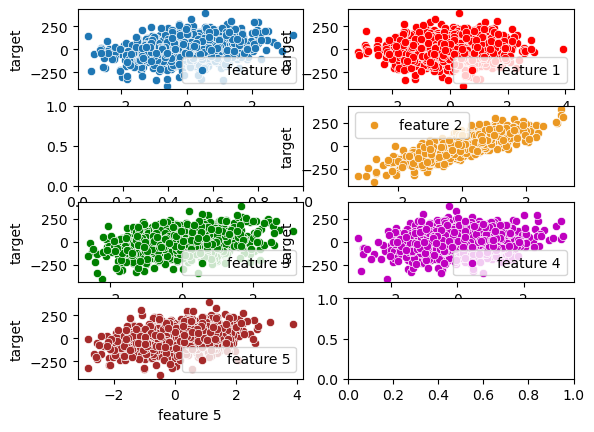

In [17]:
# Create a grid of subplots with 4 rows and 2 columns
plt.subplots(4, 2)

# Scatter plot for feature 0 vs target
plt.subplot(4, 2, 1)
sns.scatterplot(data=df, x="feature 0", y="target", label="feature 0")

# Scatter plot for feature 1 vs target (red color)
plt.subplot(4, 2, 2)
sns.scatterplot(data=df, x="feature 1", y="target", label="feature 1", color="r")

# Scatter plot for feature 2 vs target (orange color)
plt.subplot(4, 2, 4)
sns.scatterplot(data=df, x="feature 2", y="target", label="feature 2", color="#EB9822")

# Scatter plot for feature 3 vs target (green color)
plt.subplot(4, 2, 5)
sns.scatterplot(data=df, x="feature 3", y="target", label="feature 3", color="g")

# Scatter plot for feature 4 vs target (magenta color)
plt.subplot(4, 2, 6)
sns.scatterplot(data=df, x="feature 4", y="target", label="feature 4", color="m")

# Scatter plot for feature 5 vs target (brown color)
plt.subplot(4, 2, 7)
sns.scatterplot(data=df, x="feature 5", y="target", label="feature 5", color="brown")

# Add a legend to identify the features in each scatter plot
plt.legend()

# Display the plot
plt.show()

<font color='red'><u><b>Observation:</b></u></font>
- Features 0 & 5: Weak positive correlations, but scattered data indicates inconsistencies.
- Features 1, 2, 4: No clear linear relationships observed.
- Feature 3: Possible weak negative correlation, but data spread weakens the observation.

### Distribution of Features

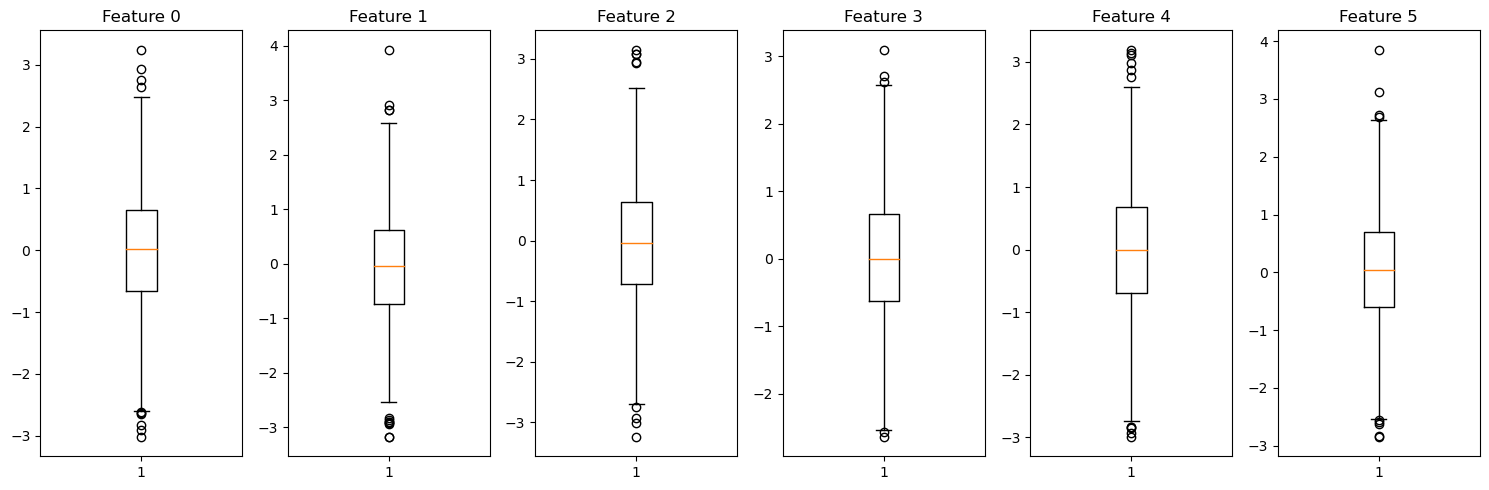

In [18]:
# Create a wider figure to accommodate multiple boxplots
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 5))

# Boxplot for feature 0
axes[0].boxplot(df["feature 0"])
axes[0].set_title('Feature 0')  # Add title to each subplot

# Boxplot for feature 1
axes[1].boxplot(df["feature 1"])
axes[1].set_title('Feature 1')

# Boxplot for feature 2
axes[2].boxplot(df["feature 2"])
axes[2].set_title('Feature 2')

# Boxplot for feature 3
axes[3].boxplot(df["feature 3"])
axes[3].set_title('Feature 3')

# Boxplot for feature 4
axes[4].boxplot(df["feature 4"])
axes[4].set_title('Feature 4')

# Boxplot for feature 5
axes[5].boxplot(df["feature 5"])
axes[5].set_title('Feature 5')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

<font color='red'><u><b>Observation:</b></u></font>
- Varied spread: IQRs indicate different extents of data concentration in the middle 50% for each feature.
- Skewness: Some features show medians shifted towards positive or negative values, suggesting potential skewness.
- Outliers: A few outliers are present in most features, requiring attention based on your analysis goals.

 ### Correlation Matrix Heatmap

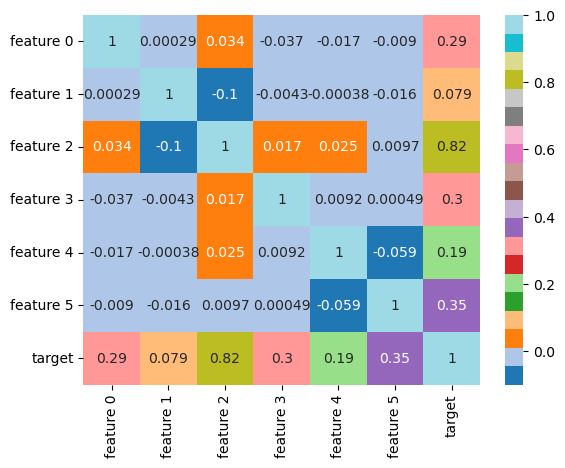

In [19]:
# Generate a heatmap to visualize the correlation matrix of the DataFrame
sns.heatmap(df.corr(), cmap="tab20", annot=True)  #In a heatmap, annot is a boolean parameter that determines whether or not to annotate the heatmap with the values of the data. If annot is set to True, the value in each cell is annotated on the heatmap.

# Display the plot
plt.show()

<font color='red'><u><b>Observation:</b></u><font>
- The heatmap shows that there is weak to moderate relationship for feature 0, feature 1, feature 3, feature 4, feature 5.
- feature 2 has the strongest relationship with target variable.

# 3. **Regression Modeling:**

### Data Spliting

In [20]:
# Separate features (X) and target variable (y)
X = df.drop(columns="target")
y = df["target"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training

In [21]:
# Creating a linear regression model
model = LinearRegression()

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

### Evaluating model

In [22]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.42961422589703785
Mean Squared Error (MSE): 0.2878934499130887
Root Mean Squared Error (RMSE): 0.5365570332342021
R-squared (R2): 0.99997556496283


<font color='red'><u><b>Observation:</b></u></font>
- Low Error: The Mean Absolute Error (MAE) of 0.42961422589703785 suggests the average difference between predicted and actual values is very small on a scale you would define based on your problem. Similarly, the low Mean Squared Error (MSE) of 0.2878934499130887 and Root Mean Squared Error (RMSE) of  0.5365570332342021 indicate small average squared differences between predictions and actual values.
- R<sup>2</sup> is near to 1 which means it can identify the testing dataset correctly.

# 4. **Model Interpretation:**

In [23]:
print(model.coef_)
print(model.intercept_)

[31.31321633 17.86584868 90.18258889 33.65109481 21.07587377 39.74436974]
-0.008145994395087452


<font color='red'><u><b>Observation:</b></u></font>
- Positive relationships: All features (feature 1 to feature 6) have positive coefficients, indicating that they all have a positive relationship with the target variable. This means that as the values of these features increase, the target variable also tends to increase.
- Negative intercept: The intercept is negative (-0.0016), which suggests a negative baseline value for the target variable even when all features are zero. This means that the model predicts a negative value for the target variable when all features are zero. There could be a few reasons for this, such as inherent costs associated with the target variable or the presence of non-linear relationships between the features and the target variable.

# 5. **Conclusion:**<br>

<font color='red'><u><b>Data Characteristics:</b></u></font>

- The dataset comprises 1000 samples with 7 features ("feature 0" to "feature 5") and a target variable named "target."
- Features are centered around 0 with moderate variability, and none exhibit extreme values compared to their means.
- The range of each feature varies, and no feature is strictly limited to a specific range.
- Weak positive correlations exist between features 0 and 5, but with scattered data indicating inconsistencies.
- Features 1, 2, and 4 show no clear linear relationships, while feature 3 possibly exhibits a weak negative correlation.
- Variability in data concentration (IQR) varies across features, and some skewness is observed.

<font color='red'><u><b>Insights:</b></u></font>

- The model appears to fit the data exceptionally well, with an R-squared value close to 1, indicating that the model explains a significant portion of the variance in the target variable.
- Coefficients suggest that features 1, 2, and 4 contribute relatively less to the prediction compared to features 0, 3, and 5.
- Feature 2 shows a strong relationship with the target variable, as indicated by the heatmap and the high coefficient value.
- Outliers present in most features may have influenced the model's performance and could be addressed to potentially improve accuracy.
- The analysis highlights the importance of considering various data characteristics, such as correlation, spread, skewness, and outliers, in building an effective regression model.

# **2nd Method**

In [ ]:
np.random.seed(0)

# 1. **Data Generation:**

Function takes 4 parameters:
1. n_rows = total number of rows
2. n_features = total number of features in the dataframe
3. error_std = it takes standard deviation of error, by default 1.5
4. intercept = the intercept of used in line equation, by default 3

In [ ]:
import numpy as np

def generate_linear_data(n_features, n_rows, intercept=3.0, error_std=1.5):
  # Generating feature names as strings
  feature_names = ["feature " + str(x) for x in range(0, n_features)]

  # Generating random X values between 0 and 10 (inclusive)
  X = np.random.uniform(low=0, high=10, size=(n_rows, n_features))

  # Creating a pandas DataFrame from the X data with named features
  df = pd.DataFrame(X, columns=feature_names)

  # Calculating true target values (Y) using a linear combination of features with random weights and the specified intercept
  Y_true = np.dot(X, np.random.uniform(low=0, high=5, size=(n_features,))) + intercept

  # Generating random normal distributed error with zero mean and specified standard deviation for all rows
  error = np.random.normal(loc=0, scale=error_std, size=n_rows)

  # Adding the random error to the true target values to create the final target variable with noise
  Y_with_error = Y_true + error

  # Adding a new column named "target" to the DataFrame containing the target variable with error
  df["target"] = Y_with_error

  return df

- NumPy array X containing random uniformly distributed values between 0 and 10 (inclusive). The array has dimensions n_rows by n_features.
- Pandas DataFrame df from the array X, where the columns are labeled with the feature names generated earlier.
- The true target values Y_true is calculated using a linear combination of the feature values (X) and randomly generated weights. It uses np.dot() to perform the dot product between X and a randomly generated weight vector. The intercept value is added to the result.
- Normally distributed error values are generated using np.random.normal(). The loc parameter sets the mean of the distribution to 0, the scale parameter sets the standard deviation to error_std, and size specifies the number of rows (n_rows).
- Random error generated in the previous step is added to the true target values Y_true to create the final target variable Y_with_error.

In [ ]:
df = generate_linear_data(6,100)

df.head()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,target
0,5.488135,7.151894,6.027634,5.448832,4.236548,6.458941,68.595824
1,4.375872,8.917730,9.636628,3.834415,7.917250,5.288949,90.919402
2,5.680446,9.255966,0.710361,0.871293,0.202184,8.326198,42.897591
3,7.781568,8.700121,9.786183,7.991586,4.614794,7.805292,92.908718
4,1.182744,6.399210,1.433533,9.446689,5.218483,4.146619,45.112311


- The DataFrame contains 100 samples.
- There are 7 features (columns named "feature 0" to "feature 5") and a target variable named "target".

# 2. **Data Exploration:**

In [ ]:
df.describe()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,target
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.823600,5.235441,5.149425,4.510180,5.020403,5.153118,62.107725
std,3.000357,3.085421,2.709155,3.024582,2.893133,2.884030,15.595994
min,0.027032,0.132369,0.078841,0.046955,0.117141,0.168717,16.958810
25%,2.095317,2.623399,2.806966,1.602577,2.769274,2.817917,50.359088
50%,4.786236,5.445266,5.479421,4.264424,5.185179,4.819990,61.666018
75%,7.312914,7.909208,7.267263,6.953589,7.008201,7.631359,72.406648
max,9.903389,9.979623,9.786183,9.854914,9.944008,9.988470,95.190106


<u>Observation</u>
- The features seem to have relatively similar means (around 5) and standard deviations (around 3).
- The target variable has a higher standard deviation (around 15.6) compared to the features, indicating more variability.
- The range of the target variable is wider than the features, spanning from 16.9 to 95.2.
- The distribution of the target variable might be skewed based on the difference between mean (62.1) and median (61.7).

### Visualizing Feature-Target Relationships

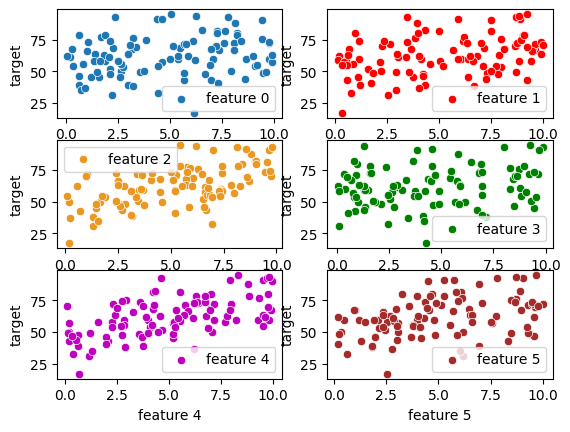

In [ ]:
# Create a grid of subplots with 3 rows and 2 columns
plt.subplots(3, 2)

# Scatter plot for feature 0 vs target
plt.subplot(3, 2, 1)
sns.scatterplot(data=df, x="feature 0", y="target", label="feature 0")

# Scatter plot for feature 1 vs target (red color)
plt.subplot(3, 2, 2)
sns.scatterplot(data=df, x="feature 1", y="target", label="feature 1", color="r")

# Scatter plot for feature 2 vs target (orange color)
plt.subplot(3, 2, 3)
sns.scatterplot(data=df, x="feature 2", y="target", label="feature 2", color="#EB9822")

# Scatter plot for feature 3 vs target (green color)
plt.subplot(3, 2, 4)
sns.scatterplot(data=df, x="feature 3", y="target", label="feature 3", color="g")

# Scatter plot for feature 4 vs target (magenta color)
plt.subplot(3, 2, 5)
sns.scatterplot(data=df, x="feature 4", y="target", label="feature 4", color="m")

# Scatter plot for feature 5 vs target (brown color)
plt.subplot(3, 2, 6)
sns.scatterplot(data=df, x="feature 5", y="target", label="feature 5", color="brown")

# Add a legend to identify the features in each scatter plot
plt.legend()

# Display the plot
plt.show()

<u>Observation</u>
- Features 0, 1, and 3 show weak positive correlations with the target variable.
- The remaining features (2, 4, and 5) don't exhibit clear linear relationships.

### Distribution of Features

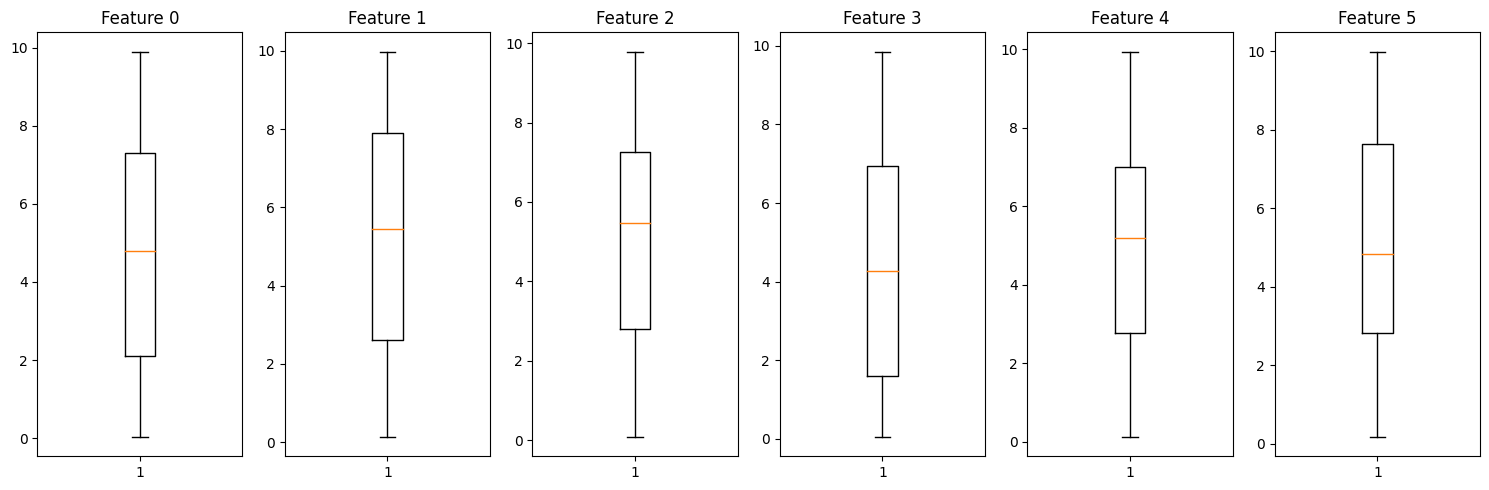

In [ ]:
# Create a wider figure to accommodate multiple boxplots
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 5))

# Boxplot for feature 0
axes[0].boxplot(df["feature 0"])
axes[0].set_title('Feature 0')  # Add title to each subplot

# Boxplot for feature 1
axes[1].boxplot(df["feature 1"])
axes[1].set_title('Feature 1')

# Boxplot for feature 2
axes[2].boxplot(df["feature 2"])
axes[2].set_title('Feature 2')

# Boxplot for feature 3
axes[3].boxplot(df["feature 3"])
axes[3].set_title('Feature 3')

# Boxplot for feature 4
axes[4].boxplot(df["feature 4"])
axes[4].set_title('Feature 4')

# Boxplot for feature 5
axes[5].boxplot(df["feature 5"])
axes[5].set_title('Feature 5')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

<u>Observation</u>
- Varied spread: Feature 3 shows the most spread-out data, while features 0, 4, and 5 are more concentrated.
- Skewness: Features 0, 4, and 5 may be skewed positive, while Feature 1 may be skewed negative.
- Outliers: Most features have outliers, requiring attention based on your analysis goals.

 ### Correlation Matrix Heatmap

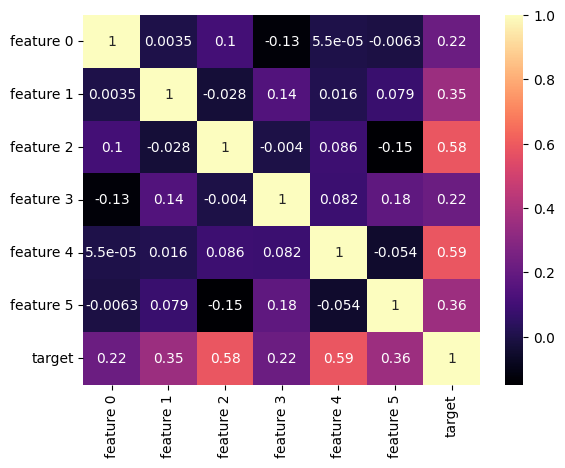

In [ ]:
# Generate a heatmap to visualize the correlation matrix of the DataFrame
sns.heatmap(df.corr(), cmap="magma", annot=True)

# Display the plot
plt.show()

<u>Observation</u>
- The heatmap shows that there is weak to moderate relationship for feature 0, feature 1, feature 3, feature 4, and feature 5 with the target variable. This is because these features have a color range of orange and red in the heatmap. - Feature 2 has a strong positive correlation with the target variable, shown by the dark blue color in the heatmap.

# 3. **Regression Modeling:**

In [ ]:
X = df.drop(columns = "target")
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 1.590353531562942
Mean Squared Error (MSE): 3.778252753196169
Root Mean Squared Error (RMSE): 1.9437728141931014
R-squared (R2): 0.9720603116673916


In [ ]:
model.coef_

array([0.63132366, 2.90379365, 3.35780318, 2.50994583, 1.2171054 ,
       2.11425255])

In [ ]:
model.intercept_

2.8319426984595566